In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 408ms/step - accuracy: 0.2031 - loss: 1.8366
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2065 - loss: 1.8154 - val_accuracy: 0.2308 - val_loss: 1.8118
Epoch 2/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2656 - loss: 1.7718
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2438 - loss: 1.7917 - val_accuracy: 0.2663 - val_loss: 1.7853
Epoch 3/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2891 - loss: 1.7527
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2938 - loss: 1.7564 - val_accuracy: 0.2663 - val_loss: 1.7603
Epoch 4/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3047 - loss: 1.7320
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3019 - loss: 1.7403 - val_accuracy: 0.2663 - val_loss: 1.7372
Epoch 5/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2891 - loss: 1.7403
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2873 - loss: 1.7419 - val_accuracy: 0.2663 - val_loss: 1.7148
Epoch 6/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2812 - loss: 1.7649
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3161 - loss: 1.7296 - val_accuracy: 0.2722 - val_loss: 1.6939
Epoch 7/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2578 - loss: 1.7054
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2971 - loss: 1.6896 - val_accuracy: 0.2899 - val_loss: 1.6740
Epoch 8/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2812 - loss: 1.6959
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3214 - loss: 1.6798 - val_accuracy: 0.3195 - val_loss: 1.6548
Epoch 9/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3516 - loss: 1.6778
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3540 - loss: 1.6781 - val_accuracy: 0.3373 - val_loss: 1.6367
Epoch 10/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4219 - loss: 1.5972
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3712 - loss: 1.6317 - val_accuracy: 0.3373 - val_loss: 1.6182
Epoch 11/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3359 - loss: 1.6430
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3543 - loss: 1.6452 - val_accuracy: 0.3373 - val_loss: 1.5995
Epoch 12/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3906 - loss: 1.6730
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3764 - loss: 1.6430 - val_accuracy: 0.3373 - val_loss: 1.5816
Epoch 13/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3750 - loss: 1.6162
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3833 - loss: 1.6128 - val_accuracy: 0.3609 - val_loss: 1.5637
Epoch 14/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3672 - loss: 1.5891
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3860 - loss: 1.5845 - val_accuracy: 0.4379 - val_loss: 1.5457
Epoch 15/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4219 - loss: 1.5611
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4204 - loss: 1.5730 - val_accuracy: 0.4497 - val_loss: 1.5274
Epoch 16/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4141 - loss: 1.5824
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3870 - loss: 1.5885 - val_accuracy: 0.4497 - val_loss: 1.5092
Epoch 17/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3750 - loss: 1.6247
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3962 - loss: 1.5855 - val_accuracy: 0.4497 - val_loss: 1.4900
Epoch 18/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3594 - loss: 1.5724
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3944 - loss: 1.5505 - val_accuracy: 0.4497 - val_loss: 1.4703
Epoch 19/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4062 - loss: 1.5728
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4176 - loss: 1.5465 - val_accuracy: 0.4497 - val_loss: 1.4501
Epoch 20/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4922 - loss: 1.5048
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4429 - loss: 1.5260 - val_accuracy: 0.4556 - val_loss: 1.4295
Epoch 21/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4531 - loss: 1.5298
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4573 - loss: 1.5013 - val_accuracy: 0.4556 - val_loss: 1.4089
Epoch 22/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4297 - loss: 1.5404
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4352 - loss: 1.5103 - val_accuracy: 0.4615 - val_loss: 1.3894
Epoch 23/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4297 - loss: 1.4782
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4571 - loss: 1.4604 - val_accuracy: 0.4675 - val_loss: 1.3706
Epoch 24/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4609 - loss: 1.4640
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4676 - loss: 1.4418 - val_accuracy: 0.4793 - val_loss: 1.3517
Epoch 25/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4297 - loss: 1.5080
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4715 - loss: 1.4413 - val_accuracy: 0.4911 - val_loss: 1.3320
Epoch 26/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4297 - loss: 1.4758
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4645 - loss: 1.4399 - val_accuracy: 0.5030 - val_loss: 1.3129
Epoch 27/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4453 - loss: 1.4788
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4652 - loss: 1.4380 - val_accuracy: 0.5089 - val_loss: 1.2939
Epoch 28/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4219 - loss: 1.5096
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4689 - loss: 1.4295 - val_accuracy: 0.5266 - val_loss: 1.2748
Epoch 29/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4688 - loss: 1.3979
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4723 - loss: 1.3979 - val_accuracy: 0.5503 - val_loss: 1.2553
Epoch 30/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5469 - loss: 1.2728
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5289 - loss: 1.3094 - val_accuracy: 0.5799 - val_loss: 1.2351
Epoch 31/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4766 - loss: 1.3503
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4665 - loss: 1.3562 - val_accuracy: 0.5976 - val_loss: 1.2154
Epoch 32/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4922 - loss: 1.3530
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5039 - loss: 1.3289 - val_accuracy: 0.6095 - val_loss: 1.1954
Epoch 33/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5469 - loss: 1.3057
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5104 - loss: 1.3225 - val_accuracy: 0.6272 - val_loss: 1.1755
Epoch 34/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5391 - loss: 1.2749
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5138 - loss: 1.2885 - val_accuracy: 0.6272 - val_loss: 1.1559
Epoch 35/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 1.2989
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5079 - loss: 1.2916 - val_accuracy: 0.6331 - val_loss: 1.1377
Epoch 36/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6172 - loss: 1.1969
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5538 - loss: 1.2448 - val_accuracy: 0.6331 - val_loss: 1.1186
Epoch 37/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5859 - loss: 1.2291
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5593 - loss: 1.2568 - val_accuracy: 0.6331 - val_loss: 1.1011
Epoch 38/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5703 - loss: 1.1908
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5492 - loss: 1.2255 - val_accuracy: 0.6331 - val_loss: 1.0835
Epoch 39/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6016 - loss: 1.2330
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5839 - loss: 1.2233 - val_accuracy: 0.6331 - val_loss: 1.0670
Epoch 40/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5781 - loss: 1.1717
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5725 - loss: 1.1999 - val_accuracy: 0.6391 - val_loss: 1.0505
Epoch 41/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5469 - loss: 1.2177
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5479 - loss: 1.2192 - val_accuracy: 0.6391 - val_loss: 1.0344
Epoch 42/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6172 - loss: 1.1420
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5899 - loss: 1.1814 - val_accuracy: 0.6450 - val_loss: 1.0182
Epoch 43/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5547 - loss: 1.1783
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5725 - loss: 1.1648 - val_accuracy: 0.6509 - val_loss: 1.0027
Epoch 44/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5859 - loss: 1.1499
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5811 - loss: 1.1869 - val_accuracy: 0.6568 - val_loss: 0.9883
Epoch 45/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5625 - loss: 1.2023
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5908 - loss: 1.1577 - val_accuracy: 0.6627 - val_loss: 0.9743
Epoch 46/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5469 - loss: 1.2160
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5477 - loss: 1.2062 - val_accuracy: 0.6805 - val_loss: 0.9596
Epoch 47/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6328 - loss: 1.1191
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6161 - loss: 1.1163 - val_accuracy: 0.6805 - val_loss: 0.9443
Epoch 48/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5938 - loss: 1.1574
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5952 - loss: 1.1618 - val_accuracy: 0.6805 - val_loss: 0.9295
Epoch 49/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6250 - loss: 1.0792
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6081 - loss: 1.0977 - val_accuracy: 0.6805 - val_loss: 0.9148
Epoch 50/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6406 - loss: 1.0758
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6022 - loss: 1.1130 - val_accuracy: 0.6805 - val_loss: 0.9014
Epoch 51/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6250 - loss: 1.0820
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6170 - loss: 1.0739 - val_accuracy: 0.6805 - val_loss: 0.8882
Epoch 52/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5938 - loss: 1.0812
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5872 - loss: 1.1017 - val_accuracy: 0.6805 - val_loss: 0.8747
Epoch 53/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5547 - loss: 1.1323
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5872 - loss: 1.1011 - val_accuracy: 0.6805 - val_loss: 0.8614
Epoch 54/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5625 - loss: 1.1491
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5847 - loss: 1.1014 - val_accuracy: 0.6805 - val_loss: 0.8484
Epoch 55/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6562 - loss: 0.9585
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6308 - loss: 1.0213 - val_accuracy: 0.6805 - val_loss: 0.8334
Epoch 56/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6250 - loss: 0.9850
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6041 - loss: 1.0255 - val_accuracy: 0.6805 - val_loss: 0.8196
Epoch 57/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6562 - loss: 1.0140
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6436 - loss: 1.0212 - val_accuracy: 0.6805 - val_loss: 0.8073
Epoch 58/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5938 - loss: 1.0938
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6371 - loss: 1.0260 - val_accuracy: 0.6864 - val_loss: 0.7951
Epoch 59/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6094 - loss: 1.0407
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6206 - loss: 1.0381 - val_accuracy: 0.6982 - val_loss: 0.7836
Epoch 60/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5938 - loss: 1.0117
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6193 - loss: 1.0062 - val_accuracy: 0.7041 - val_loss: 0.7728
Epoch 61/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5547 - loss: 1.1060
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6029 - loss: 1.0428 - val_accuracy: 0.7041 - val_loss: 0.7633
Epoch 62/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6484 - loss: 0.9370
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6656 - loss: 0.9493 - val_accuracy: 0.7101 - val_loss: 0.7527
Epoch 63/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6250 - loss: 1.0650
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6274 - loss: 1.0308 - val_accuracy: 0.7456 - val_loss: 0.7442
Epoch 64/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5859 - loss: 0.9773
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6233 - loss: 0.9704 - val_accuracy: 0.7692 - val_loss: 0.7358
Epoch 65/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6641 - loss: 0.9407
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6559 - loss: 0.9681 - val_accuracy: 0.7929 - val_loss: 0.7266
Epoch 66/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6172 - loss: 0.9970
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6411 - loss: 0.9645 - val_accuracy: 0.7929 - val_loss: 0.7144
Epoch 67/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6562 - loss: 0.9461
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6777 - loss: 0.9441 - val_accuracy: 0.7929 - val_loss: 0.7009
Epoch 68/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7031 - loss: 0.8738
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6805 - loss: 0.9019 - val_accuracy: 0.7929 - val_loss: 0.6880
Epoch 69/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6406 - loss: 0.9714
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6533 - loss: 0.9527 - val_accuracy: 0.7988 - val_loss: 0.6794
Epoch 70/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5781 - loss: 1.0293
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6285 - loss: 0.9689 - val_accuracy: 0.8166 - val_loss: 0.6717
Epoch 71/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7031 - loss: 0.8026
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6899 - loss: 0.8719 - val_accuracy: 0.8343 - val_loss: 0.6643
Epoch 72/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6875 - loss: 0.9151
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6682 - loss: 0.9058 - val_accuracy: 0.8343 - val_loss: 0.6564
Epoch 73/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6641 - loss: 0.8780
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6510 - loss: 0.9046 - val_accuracy: 0.8284 - val_loss: 0.6470
Epoch 74/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5938 - loss: 0.9646
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6498 - loss: 0.8994 - val_accuracy: 0.8402 - val_loss: 0.6386
Epoch 75/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6875 - loss: 0.8554
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6828 - loss: 0.8830 - val_accuracy: 0.8580 - val_loss: 0.6291
Epoch 76/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6641 - loss: 0.8966
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6536 - loss: 0.9196 - val_accuracy: 0.8639 - val_loss: 0.6211
Epoch 77/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6719 - loss: 0.8582
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6447 - loss: 0.8915 - val_accuracy: 0.8757 - val_loss: 0.6143
Epoch 78/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6406 - loss: 0.8823
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6698 - loss: 0.8762 - val_accuracy: 0.8994 - val_loss: 0.6098
Epoch 79/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6484 - loss: 0.9165
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6805 - loss: 0.8473 - val_accuracy: 0.8994 - val_loss: 0.6041
Epoch 80/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6406 - loss: 0.9345
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6693 - loss: 0.8845 - val_accuracy: 0.9112 - val_loss: 0.5998
Epoch 81/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6875 - loss: 0.8902
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7091 - loss: 0.8338 - val_accuracy: 0.9112 - val_loss: 0.5932
Epoch 82/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6172 - loss: 0.9880
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6359 - loss: 0.9292 - val_accuracy: 0.9112 - val_loss: 0.5844
Epoch 83/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6641 - loss: 0.8793
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6808 - loss: 0.8383 - val_accuracy: 0.9172 - val_loss: 0.5764
Epoch 84/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6719 - loss: 0.8806
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6617 - loss: 0.8702 - val_accuracy: 0.9172 - val_loss: 0.5687
Epoch 85/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7109 - loss: 0.7794
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6739 - loss: 0.8459 - val_accuracy: 0.9172 - val_loss: 0.5621
Epoch 86/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6250 - loss: 0.8535
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6429 - loss: 0.8783 - val_accuracy: 0.9231 - val_loss: 0.5583
Epoch 87/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.7930
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7116 - loss: 0.8072 - val_accuracy: 0.9290 - val_loss: 0.5543
Epoch 88/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6562 - loss: 0.8617
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6824 - loss: 0.8157 - val_accuracy: 0.9290 - val_loss: 0.5496
Epoch 89/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6875 - loss: 0.8460
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6931 - loss: 0.8357 - val_accuracy: 0.9290 - val_loss: 0.5432
Epoch 90/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6953 - loss: 0.8164
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6973 - loss: 0.8078 - val_accuracy: 0.9290 - val_loss: 0.5368
Epoch 91/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.7664
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6933 - loss: 0.8027 - val_accuracy: 0.9290 - val_loss: 0.5329
Epoch 92/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6328 - loss: 0.8853
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6853 - loss: 0.8167 - val_accuracy: 0.9290 - val_loss: 0.5302
Epoch 93/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7188 - loss: 0.7479
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7098 - loss: 0.7853 - val_accuracy: 0.9290 - val_loss: 0.5236
Epoch 94/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8203 - loss: 0.6749
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7523 - loss: 0.7399 - val_accuracy: 0.9349 - val_loss: 0.5162
Epoch 95/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6953 - loss: 0.7555
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6942 - loss: 0.7934 - val_accuracy: 0.9349 - val_loss: 0.5112
Epoch 96/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7031 - loss: 0.7947
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6955 - loss: 0.8105 - val_accuracy: 0.9349 - val_loss: 0.5078
Epoch 97/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.7366
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7305 - loss: 0.7372 - val_accuracy: 0.9349 - val_loss: 0.5050
Epoch 98/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.6897
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7249 - loss: 0.7576 - val_accuracy: 0.9408 - val_loss: 0.5012
Epoch 99/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7031 - loss: 0.7663
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7092 - loss: 0.7585 - val_accuracy: 0.9408 - val_loss: 0.4980
Epoch 100/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7031 - loss: 0.6997
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6868 - loss: 0.7773 - val_accuracy: 0.9408 - val_loss: 0.4925
Epoch 101/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6641 - loss: 0.8458
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6704 - loss: 0.8212 - val_accuracy: 0.9408 - val_loss: 0.4895
Epoch 102/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6641 - loss: 0.7638
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6915 - loss: 0.7513 - val_accuracy: 0.9408 - val_loss: 0.4844
Epoch 103/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.7706
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7164 - loss: 0.7669 - val_accuracy: 0.9408 - val_loss: 0.4810
Epoch 104/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.7813
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7090 - loss: 0.7734 - val_accuracy: 0.9349 - val_loss: 0.4798
Epoch 105/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6797 - loss: 0.7230
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6811 - loss: 0.7645 - val_accuracy: 0.9349 - val_loss: 0.4775
Epoch 106/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6016 - loss: 0.9538
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6581 - loss: 0.8416 - val_accuracy: 0.9408 - val_loss: 0.4763
Epoch 107/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6406 - loss: 0.8413
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6691 - loss: 0.7944 - val_accuracy: 0.9408 - val_loss: 0.4747
Epoch 108/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6562 - loss: 0.7931
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6874 - loss: 0.7602 - val_accuracy: 0.9527 - val_loss: 0.4718
Epoch 109/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.6777
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7451 - loss: 0.7002 - val_accuracy: 0.9527 - val_loss: 0.4654
Epoch 110/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.7836
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7103 - loss: 0.7820 - val_accuracy: 0.9467 - val_loss: 0.4587
Epoch 111/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6719 - loss: 0.7529
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7070 - loss: 0.7356 - val_accuracy: 0.9467 - val_loss: 0.4528
Epoch 112/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.7238
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7409 - loss: 0.7441 - val_accuracy: 0.9467 - val_loss: 0.4491
Epoch 113/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.7016
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7051 - loss: 0.7418 - val_accuracy: 0.9408 - val_loss: 0.4472
Epoch 114/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5859 - loss: 0.9244
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6920 - loss: 0.7878 - val_accuracy: 0.9467 - val_loss: 0.4479
Epoch 115/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7031 - loss: 0.7452
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7138 - loss: 0.7099 - val_accuracy: 0.9467 - val_loss: 0.4471
Epoch 116/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.7582
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7261 - loss: 0.7529 - val_accuracy: 0.9467 - val_loss: 0.4442
Epoch 117/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.6944
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7242 - loss: 0.6816 - val_accuracy: 0.9467 - val_loss: 0.4401
Epoch 118/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.7791
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7451 - loss: 0.7184 - val_accuracy: 0.9467 - val_loss: 0.4369
Epoch 119/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6953 - loss: 0.7334
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6963 - loss: 0.7213 - val_accuracy: 0.9527 - val_loss: 0.4328
Epoch 120/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7188 - loss: 0.7153
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7149 - loss: 0.7324 - val_accuracy: 0.9586 - val_loss: 0.4280
Epoch 121/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7109 - loss: 0.7196
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7266 - loss: 0.7028 - val_accuracy: 0.9704 - val_loss: 0.4255
Epoch 122/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6875 - loss: 0.7727
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7224 - loss: 0.7284 - val_accuracy: 0.9704 - val_loss: 0.4243
Epoch 123/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7344 - loss: 0.6942
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7310 - loss: 0.6943 - val_accuracy: 0.9645 - val_loss: 0.4205
Epoch 124/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.6779
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7287 - loss: 0.6889 - val_accuracy: 0.9645 - val_loss: 0.4183
Epoch 125/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.6447
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7189 - loss: 0.6798 - val_accuracy: 0.9645 - val_loss: 0.4148
Epoch 126/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6250 - loss: 0.8301
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6856 - loss: 0.7549 - val_accuracy: 0.9645 - val_loss: 0.4118
Epoch 127/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.7265
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7402 - loss: 0.7096 - val_accuracy: 0.9704 - val_loss: 0.4098
Epoch 128/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7656 - loss: 0.6716
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7611 - loss: 0.6680 - val_accuracy: 0.9704 - val_loss: 0.4076
Epoch 129/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.7706
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7339 - loss: 0.7204 - val_accuracy: 0.9704 - val_loss: 0.4060
Epoch 130/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.6505
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7320 - loss: 0.7017 - val_accuracy: 0.9704 - val_loss: 0.4041
Epoch 131/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.6856
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7438 - loss: 0.7001 - val_accuracy: 0.9704 - val_loss: 0.4022
Epoch 132/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.6390
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7425 - loss: 0.6817 - val_accuracy: 0.9763 - val_loss: 0.4005
Epoch 133/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7578 - loss: 0.6049
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7449 - loss: 0.6466 - val_accuracy: 0.9704 - val_loss: 0.3969
Epoch 134/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6875 - loss: 0.6962
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7054 - loss: 0.7130 - val_accuracy: 0.9763 - val_loss: 0.3933
Epoch 135/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.7189
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7480 - loss: 0.6837 - val_accuracy: 0.9882 - val_loss: 0.3916
Epoch 136/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7109 - loss: 0.8221
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7245 - loss: 0.7438 - val_accuracy: 0.9882 - val_loss: 0.3901
Epoch 137/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.6619
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7282 - loss: 0.6742 - val_accuracy: 0.9822 - val_loss: 0.3901
Epoch 138/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.6369
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7425 - loss: 0.6941 - val_accuracy: 0.9763 - val_loss: 0.3910
Epoch 139/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8125 - loss: 0.6269
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7836 - loss: 0.6452 - val_accuracy: 0.9763 - val_loss: 0.3890
Epoch 140/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.6690
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7339 - loss: 0.6737 - val_accuracy: 0.9763 - val_loss: 0.3850
Epoch 141/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8203 - loss: 0.5859
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7935 - loss: 0.6360 - val_accuracy: 0.9704 - val_loss: 0.3803
Epoch 142/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6953 - loss: 0.7835
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7078 - loss: 0.7108 - val_accuracy: 0.9704 - val_loss: 0.3752
Epoch 143/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7656 - loss: 0.6747
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7360 - loss: 0.6944 - val_accuracy: 0.9704 - val_loss: 0.3723
Epoch 144/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.6001
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7666 - loss: 0.6190 - val_accuracy: 0.9704 - val_loss: 0.3706
Epoch 145/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7422 - loss: 0.6701
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6991 - loss: 0.7233 - val_accuracy: 0.9704 - val_loss: 0.3692
Epoch 146/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.6872
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7486 - loss: 0.6522 - val_accuracy: 0.9645 - val_loss: 0.3682
Epoch 147/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.6434
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7446 - loss: 0.6710 - val_accuracy: 0.9704 - val_loss: 0.3674
Epoch 148/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.6412
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7284 - loss: 0.6940 - val_accuracy: 0.9704 - val_loss: 0.3675
Epoch 149/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7266 - loss: 0.7067
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7232 - loss: 0.7201 - val_accuracy: 0.9882 - val_loss: 0.3665
Epoch 150/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.6234
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7267 - loss: 0.6710 - val_accuracy: 0.9882 - val_loss: 0.3656
Epoch 151/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6641 - loss: 0.7749
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6937 - loss: 0.7220 - val_accuracy: 0.9941 - val_loss: 0.3640
Epoch 152/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.6988
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7269 - loss: 0.6892 - val_accuracy: 0.9882 - val_loss: 0.3609
Epoch 153/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7188 - loss: 0.6955
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7531 - loss: 0.6471 - val_accuracy: 0.9882 - val_loss: 0.3573
Epoch 154/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.7253
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7436 - loss: 0.6793 - val_accuracy: 0.9882 - val_loss: 0.3551
Epoch 155/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.6711
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7234 - loss: 0.6805 - val_accuracy: 0.9882 - val_loss: 0.3539
Epoch 156/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6719 - loss: 0.7498
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6997 - loss: 0.7451 - val_accuracy: 0.9882 - val_loss: 0.3518
Epoch 157/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5962
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7906 - loss: 0.6312 - val_accuracy: 0.9882 - val_loss: 0.3495
Epoch 158/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.6643
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7563 - loss: 0.6686 - val_accuracy: 0.9882 - val_loss: 0.3482
Epoch 159/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.6310
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7572 - loss: 0.6318 - val_accuracy: 0.9941 - val_loss: 0.3475
Epoch 160/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7578 - loss: 0.6276
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7415 - loss: 0.6626 - val_accuracy: 0.9941 - val_loss: 0.3481
Epoch 161/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5817
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7621 - loss: 0.6304 - val_accuracy: 0.9941 - val_loss: 0.3487
Epoch 162/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6611
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7543 - loss: 0.6470 - val_accuracy: 0.9941 - val_loss: 0.3453
Epoch 163/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.6641
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7575 - loss: 0.6414 - val_accuracy: 0.9941 - val_loss: 0.3402
Epoch 164/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.6778
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7367 - loss: 0.6685 - val_accuracy: 0.9941 - val_loss: 0.3362
Epoch 165/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.5812
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7373 - loss: 0.6402 - val_accuracy: 0.9941 - val_loss: 0.3328
Epoch 166/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.6364
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7585 - loss: 0.6266 - val_accuracy: 0.9941 - val_loss: 0.3312
Epoch 167/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.7214
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7457 - loss: 0.6506 - val_accuracy: 0.9941 - val_loss: 0.3312
Epoch 168/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.6627
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7509 - loss: 0.6397 - val_accuracy: 0.9941 - val_loss: 0.3307
Epoch 169/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.6551
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7658 - loss: 0.6182 - val_accuracy: 0.9941 - val_loss: 0.3310
Epoch 170/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6953 - loss: 0.7143
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7125 - loss: 0.6863 - val_accuracy: 0.9941 - val_loss: 0.3298
Epoch 171/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6592
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7446 - loss: 0.6641 - val_accuracy: 0.9882 - val_loss: 0.3293
Epoch 172/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7266 - loss: 0.7157
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7313 - loss: 0.6806 - val_accuracy: 0.9822 - val_loss: 0.3312
Epoch 173/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 0.7469
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7667 - loss: 0.6429 - val_accuracy: 0.9763 - val_loss: 0.3317
Epoch 174/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.6252
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7389 - loss: 0.6569 - val_accuracy: 0.9763 - val_loss: 0.3321
Epoch 175/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.6653
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7426 - loss: 0.6418 - val_accuracy: 0.9704 - val_loss: 0.3335
Epoch 176/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6953 - loss: 0.6882
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7110 - loss: 0.6669 - val_accuracy: 0.9763 - val_loss: 0.3323
Epoch 177/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.6219
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7716 - loss: 0.6359 - val_accuracy: 0.9763 - val_loss: 0.3302
Epoch 178/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7656 - loss: 0.6087
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7540 - loss: 0.6246 - val_accuracy: 0.9822 - val_loss: 0.3275
Epoch 179/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6875 - loss: 0.6849
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7127 - loss: 0.6909 - val_accuracy: 0.9941 - val_loss: 0.3259
Epoch 180/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7578 - loss: 0.7040
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7488 - loss: 0.6727 - val_accuracy: 0.9941 - val_loss: 0.3261
Epoch 181/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.6500
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7647 - loss: 0.6250 - val_accuracy: 0.9941 - val_loss: 0.3249
Epoch 182/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7422 - loss: 0.6458
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7585 - loss: 0.6441 - val_accuracy: 0.9941 - val_loss: 0.3240
Epoch 183/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.5773
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7643 - loss: 0.6049 - val_accuracy: 0.9941 - val_loss: 0.3217
Epoch 184/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7031 - loss: 0.6750
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7122 - loss: 0.6838 - val_accuracy: 0.9941 - val_loss: 0.3197
Epoch 185/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.5831
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7672 - loss: 0.5867 - val_accuracy: 0.9941 - val_loss: 0.3182
Epoch 186/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7109 - loss: 0.6802
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7345 - loss: 0.6602 - val_accuracy: 0.9941 - val_loss: 0.3169
Epoch 187/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.6936
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7601 - loss: 0.6663 - val_accuracy: 0.9941 - val_loss: 0.3161
Epoch 188/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.5750
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7402 - loss: 0.6137 - val_accuracy: 0.9941 - val_loss: 0.3139
Epoch 189/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.5895
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7737 - loss: 0.5944 - val_accuracy: 0.9941 - val_loss: 0.3112
Epoch 190/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7656 - loss: 0.5723
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7693 - loss: 0.5793 - val_accuracy: 0.9941 - val_loss: 0.3088
Epoch 191/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.6221
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7666 - loss: 0.6102 - val_accuracy: 0.9882 - val_loss: 0.3063
Epoch 192/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7891 - loss: 0.5844
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7698 - loss: 0.6048 - val_accuracy: 0.9822 - val_loss: 0.3041
Epoch 193/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8203 - loss: 0.5560
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8043 - loss: 0.5510 - val_accuracy: 0.9822 - val_loss: 0.3002
Epoch 194/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6875 - loss: 0.7356
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7379 - loss: 0.6754 - val_accuracy: 0.9941 - val_loss: 0.2966
Epoch 195/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8047 - loss: 0.5047
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7705 - loss: 0.5768 - val_accuracy: 0.9941 - val_loss: 0.2949
Epoch 196/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.5543
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7995 - loss: 0.5944 - val_accuracy: 0.9882 - val_loss: 0.2927
Epoch 197/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.5974
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7426 - loss: 0.6072 - val_accuracy: 0.9882 - val_loss: 0.2914
Epoch 198/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7344 - loss: 0.6337
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7596 - loss: 0.5859 - val_accuracy: 0.9882 - val_loss: 0.2901
Epoch 199/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.5724
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7748 - loss: 0.5987 - val_accuracy: 0.9941 - val_loss: 0.2890
Epoch 200/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5682
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7718 - loss: 0.5906 - val_accuracy: 0.9941 - val_loss: 0.2888
Epoch 201/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7969 - loss: 0.5798
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7773 - loss: 0.5973 - val_accuracy: 0.9941 - val_loss: 0.2892
Epoch 202/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7422 - loss: 0.6508
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7582 - loss: 0.6157 - val_accuracy: 0.9941 - val_loss: 0.2901
Epoch 203/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7344 - loss: 0.7004
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7586 - loss: 0.6306 - val_accuracy: 0.9941 - val_loss: 0.2908
Epoch 204/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7656 - loss: 0.5870
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7763 - loss: 0.6038 - val_accuracy: 0.9941 - val_loss: 0.2901
Epoch 205/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7031 - loss: 0.7027
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7355 - loss: 0.6380 - val_accuracy: 0.9941 - val_loss: 0.2896
Epoch 206/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7266 - loss: 0.6962
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7643 - loss: 0.6188 - val_accuracy: 0.9941 - val_loss: 0.2894
Epoch 207/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.4961
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8116 - loss: 0.5417 - val_accuracy: 0.9941 - val_loss: 0.2867
Epoch 208/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.5695
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7850 - loss: 0.5718 - val_accuracy: 0.9882 - val_loss: 0.2838
Epoch 209/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5409
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7659 - loss: 0.5696 - val_accuracy: 0.9882 - val_loss: 0.2799
Epoch 210/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7812 - loss: 0.5684
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7638 - loss: 0.5989 - val_accuracy: 0.9882 - val_loss: 0.2777
Epoch 211/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.6134
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7805 - loss: 0.5942 - val_accuracy: 0.9882 - val_loss: 0.2759
Epoch 212/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7109 - loss: 0.6703
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7426 - loss: 0.6193 - val_accuracy: 0.9882 - val_loss: 0.2756
Epoch 213/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.5769
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7697 - loss: 0.5899 - val_accuracy: 0.9882 - val_loss: 0.2759
Epoch 214/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7578 - loss: 0.6357
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7612 - loss: 0.6363 - val_accuracy: 0.9941 - val_loss: 0.2773
Epoch 215/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7266 - loss: 0.6720
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7451 - loss: 0.6305 - val_accuracy: 0.9941 - val_loss: 0.2784
Epoch 216/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.4316
Epoch 216: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8110 - loss: 0.5125 - val_accuracy: 0.9941 - val_loss: 0.2767
Epoch 217/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7734 - loss: 0.6492
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7577 - loss: 0.6367 - val_accuracy: 0.9941 - val_loss: 0.2769
Epoch 218/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8047 - loss: 0.6101
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7755 - loss: 0.6042 - val_accuracy: 0.9941 - val_loss: 0.2799
Epoch 219/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.6814
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7638 - loss: 0.6333 - val_accuracy: 0.9941 - val_loss: 0.2804
Epoch 220/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7891 - loss: 0.6129
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7928 - loss: 0.5928 - val_accuracy: 0.9941 - val_loss: 0.2785
Epoch 221/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5787
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7786 - loss: 0.6102 - val_accuracy: 0.9941 - val_loss: 0.2762
Epoch 222/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8438 - loss: 0.4600
Epoch 222: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7856 - loss: 0.5576 - val_accuracy: 0.9941 - val_loss: 0.2731
Epoch 223/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5815
Epoch 223: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7781 - loss: 0.5780 - val_accuracy: 0.9941 - val_loss: 0.2742
Epoch 224/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8203 - loss: 0.5548
Epoch 224: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8092 - loss: 0.5440 - val_accuracy: 0.9941 - val_loss: 0.2724
Epoch 225/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.7127
Epoch 225: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7692 - loss: 0.6451 - val_accuracy: 0.9941 - val_loss: 0.2735
Epoch 226/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.5026
Epoch 226: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7857 - loss: 0.5727 - val_accuracy: 0.9941 - val_loss: 0.2749
Epoch 227/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.4459
Epoch 227: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7992 - loss: 0.5303 - val_accuracy: 0.9941 - val_loss: 0.2740
Epoch 228/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7969 - loss: 0.5329
Epoch 228: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7936 - loss: 0.5478 - val_accuracy: 0.9941 - val_loss: 0.2714
Epoch 229/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7656 - loss: 0.6358
Epoch 229: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7561 - loss: 0.6374 - val_accuracy: 0.9941 - val_loss: 0.2677
Epoch 230/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7422 - loss: 0.5904
Epoch 230: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7685 - loss: 0.5695 - val_accuracy: 0.9941 - val_loss: 0.2635
Epoch 231/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7812 - loss: 0.5529
Epoch 231: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7742 - loss: 0.5596 - val_accuracy: 0.9941 - val_loss: 0.2611
Epoch 232/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.6116
Epoch 232: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7685 - loss: 0.5831 - val_accuracy: 0.9941 - val_loss: 0.2600
Epoch 233/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5525
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7896 - loss: 0.5538 - val_accuracy: 0.9941 - val_loss: 0.2602
Epoch 234/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.5501
Epoch 234: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8056 - loss: 0.5523 - val_accuracy: 0.9941 - val_loss: 0.2597
Epoch 235/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7344 - loss: 0.6126
Epoch 235: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7682 - loss: 0.5788 - val_accuracy: 0.9941 - val_loss: 0.2602
Epoch 236/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7422 - loss: 0.5464
Epoch 236: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7698 - loss: 0.5482 - val_accuracy: 0.9941 - val_loss: 0.2592
Epoch 237/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7969 - loss: 0.6109
Epoch 237: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7762 - loss: 0.5898 - val_accuracy: 0.9941 - val_loss: 0.2587
Epoch 238/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7891 - loss: 0.5054
Epoch 238: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7718 - loss: 0.5718 - val_accuracy: 0.9941 - val_loss: 0.2596
Epoch 239/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7031 - loss: 0.6638
Epoch 239: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7285 - loss: 0.6444 - val_accuracy: 0.9941 - val_loss: 0.2633
Epoch 240/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8203 - loss: 0.4397
Epoch 240: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8016 - loss: 0.4963 - val_accuracy: 0.9941 - val_loss: 0.2637
Epoch 241/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.6134
Epoch 241: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7609 - loss: 0.5907 - val_accuracy: 0.9941 - val_loss: 0.2637
Epoch 242/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.6301
Epoch 242: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7815 - loss: 0.5886 - val_accuracy: 0.9941 - val_loss: 0.2635
Epoch 243/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.5430
Epoch 243: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7779 - loss: 0.5403 - val_accuracy: 0.9941 - val_loss: 0.2634
Epoch 244/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7812 - loss: 0.5269
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7821 - loss: 0.5359 - val_accuracy: 0.9941 - val_loss: 0.2634
Epoch 245/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.5983
Epoch 245: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7639 - loss: 0.5778 - val_accuracy: 0.9941 - val_loss: 0.2612
Epoch 246/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.5763
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8147 - loss: 0.5493 - val_accuracy: 0.9941 - val_loss: 0.2597
Epoch 247/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.5862
Epoch 247: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7664 - loss: 0.5734 - val_accuracy: 0.9941 - val_loss: 0.2587
Epoch 248/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7969 - loss: 0.5094
Epoch 248: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8066 - loss: 0.5022 - val_accuracy: 0.9941 - val_loss: 0.2533
Epoch 249/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7031 - loss: 0.7017
Epoch 249: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7513 - loss: 0.6078 - val_accuracy: 0.9941 - val_loss: 0.2490
Epoch 250/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.5412
Epoch 250: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7907 - loss: 0.5065 - val_accuracy: 0.9941 - val_loss: 0.2468
Epoch 251/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8281 - loss: 0.5486
Epoch 251: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8178 - loss: 0.5471 - val_accuracy: 0.9941 - val_loss: 0.2466
Epoch 252/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.6532
Epoch 252: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7651 - loss: 0.6334 - val_accuracy: 0.9941 - val_loss: 0.2486
Epoch 253/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.5691
Epoch 253: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7627 - loss: 0.5756 - val_accuracy: 0.9941 - val_loss: 0.2512
Epoch 254/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5055
Epoch 254: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7613 - loss: 0.5668 - val_accuracy: 0.9941 - val_loss: 0.2548
Epoch 255/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.6198
Epoch 255: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7920 - loss: 0.5774 - val_accuracy: 0.9941 - val_loss: 0.2572
Epoch 256/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5530
Epoch 256: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7624 - loss: 0.5696 - val_accuracy: 0.9941 - val_loss: 0.2574
Epoch 257/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.6382
Epoch 257: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7800 - loss: 0.5974 - val_accuracy: 0.9941 - val_loss: 0.2553
Epoch 258/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8281 - loss: 0.4517
Epoch 258: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8016 - loss: 0.5183 - val_accuracy: 0.9941 - val_loss: 0.2525
Epoch 259/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7734 - loss: 0.5974
Epoch 259: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7813 - loss: 0.5761 - val_accuracy: 0.9941 - val_loss: 0.2504
Epoch 260/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5190
Epoch 260: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7912 - loss: 0.5426 - val_accuracy: 0.9941 - val_loss: 0.2493
Epoch 261/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8516 - loss: 0.4372
Epoch 261: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7890 - loss: 0.5404 - val_accuracy: 0.9941 - val_loss: 0.2468
Epoch 262/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7812 - loss: 0.5979
Epoch 262: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7666 - loss: 0.5951 - val_accuracy: 0.9941 - val_loss: 0.2454
Epoch 263/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.6002
Epoch 263: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8127 - loss: 0.5755 - val_accuracy: 0.9941 - val_loss: 0.2453
Epoch 264/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7656 - loss: 0.5909
Epoch 264: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7787 - loss: 0.5611 - val_accuracy: 0.9941 - val_loss: 0.2455
Epoch 265/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.4582
Epoch 265: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8084 - loss: 0.5219 - val_accuracy: 0.9941 - val_loss: 0.2452
Epoch 266/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.6129
Epoch 266: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7693 - loss: 0.5912 - val_accuracy: 0.9941 - val_loss: 0.2470
Epoch 267/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7578 - loss: 0.6077
Epoch 267: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7829 - loss: 0.5633 - val_accuracy: 0.9941 - val_loss: 0.2465
Epoch 268/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5197
Epoch 268: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7791 - loss: 0.5593 - val_accuracy: 0.9941 - val_loss: 0.2436
Epoch 269/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8125 - loss: 0.5627
Epoch 269: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8142 - loss: 0.5219 - val_accuracy: 0.9941 - val_loss: 0.2402
Epoch 270/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.5884
Epoch 270: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7755 - loss: 0.5898 - val_accuracy: 0.9941 - val_loss: 0.2385
Epoch 271/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.5703
Epoch 271: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7672 - loss: 0.5559 - val_accuracy: 0.9941 - val_loss: 0.2371
Epoch 272/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5706
Epoch 272: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7938 - loss: 0.5521 - val_accuracy: 0.9941 - val_loss: 0.2378
Epoch 273/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5182
Epoch 273: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7789 - loss: 0.5517 - val_accuracy: 0.9941 - val_loss: 0.2391
Epoch 274/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.4623
Epoch 274: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7893 - loss: 0.5014 - val_accuracy: 0.9941 - val_loss: 0.2393
Epoch 275/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7656 - loss: 0.5031
Epoch 275: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7942 - loss: 0.5169 - val_accuracy: 0.9941 - val_loss: 0.2388
Epoch 276/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7969 - loss: 0.5533
Epoch 276: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7998 - loss: 0.5396 - val_accuracy: 0.9941 - val_loss: 0.2365
Epoch 277/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7734 - loss: 0.5809
Epoch 277: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7787 - loss: 0.5713 - val_accuracy: 0.9941 - val_loss: 0.2351
Epoch 278/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.5495
Epoch 278: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7886 - loss: 0.5368 - val_accuracy: 0.9941 - val_loss: 0.2366
Epoch 279/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7969 - loss: 0.5482
Epoch 279: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7817 - loss: 0.5627 - val_accuracy: 0.9941 - val_loss: 0.2391
Epoch 280/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5056
Epoch 280: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7996 - loss: 0.5400 - val_accuracy: 0.9941 - val_loss: 0.2381
Epoch 281/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7500 - loss: 0.6103
Epoch 281: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7714 - loss: 0.5652 - val_accuracy: 0.9941 - val_loss: 0.2367
Epoch 282/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.4622
Epoch 282: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8084 - loss: 0.5129 - val_accuracy: 0.9941 - val_loss: 0.2329
Epoch 283/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5879
Epoch 283: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7752 - loss: 0.5689 - val_accuracy: 0.9941 - val_loss: 0.2329
Epoch 284/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7891 - loss: 0.5443
Epoch 284: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7894 - loss: 0.5440 - val_accuracy: 0.9941 - val_loss: 0.2330
Epoch 285/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5479
Epoch 285: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8108 - loss: 0.5302 - val_accuracy: 0.9941 - val_loss: 0.2334
Epoch 286/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7891 - loss: 0.5697
Epoch 286: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7933 - loss: 0.5391 - val_accuracy: 0.9941 - val_loss: 0.2323
Epoch 287/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7969 - loss: 0.5616
Epoch 287: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7904 - loss: 0.5474 - val_accuracy: 0.9941 - val_loss: 0.2282
Epoch 288/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7422 - loss: 0.6828
Epoch 288: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7790 - loss: 0.6026 - val_accuracy: 0.9941 - val_loss: 0.2271
Epoch 289/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8047 - loss: 0.4596
Epoch 289: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8019 - loss: 0.5070 - val_accuracy: 0.9941 - val_loss: 0.2263
Epoch 290/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7812 - loss: 0.5410
Epoch 290: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7892 - loss: 0.5368 - val_accuracy: 0.9941 - val_loss: 0.2277
Epoch 291/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.5730
Epoch 291: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7703 - loss: 0.5833 - val_accuracy: 0.9941 - val_loss: 0.2301
Epoch 292/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7969 - loss: 0.5365
Epoch 292: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8017 - loss: 0.5246 - val_accuracy: 0.9941 - val_loss: 0.2313
Epoch 293/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.6286
Epoch 293: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7859 - loss: 0.6110 - val_accuracy: 0.9941 - val_loss: 0.2340
Epoch 294/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.5124
Epoch 294: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7764 - loss: 0.5583 - val_accuracy: 0.9941 - val_loss: 0.2363
Epoch 295/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.4789
Epoch 295: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7877 - loss: 0.5250 - val_accuracy: 0.9941 - val_loss: 0.2387
Epoch 296/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.4515
Epoch 296: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8037 - loss: 0.4980 - val_accuracy: 0.9941 - val_loss: 0.2401
Epoch 297/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8125 - loss: 0.5073
Epoch 297: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7988 - loss: 0.5350 - val_accuracy: 0.9941 - val_loss: 0.2390
Epoch 298/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.5610
Epoch 298: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7779 - loss: 0.5460 - val_accuracy: 0.9941 - val_loss: 0.2388
Epoch 299/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5613
Epoch 299: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7933 - loss: 0.5287 - val_accuracy: 0.9941 - val_loss: 0.2376
Epoch 300/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7891 - loss: 0.5119
Epoch 300: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8056 - loss: 0.5167 - val_accuracy: 0.9941 - val_loss: 0.2347
Epoch 301/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8438 - loss: 0.4490
Epoch 301: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8302 - loss: 0.4789 - val_accuracy: 0.9941 - val_loss: 0.2302
Epoch 302/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7656 - loss: 0.6024
Epoch 302: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7810 - loss: 0.5712 - val_accuracy: 0.9941 - val_loss: 0.2280
Epoch 303/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5451
Epoch 303: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8153 - loss: 0.5028 - val_accuracy: 0.9941 - val_loss: 0.2249
Epoch 304/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.6429
Epoch 304: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7732 - loss: 0.5928 - val_accuracy: 0.9941 - val_loss: 0.2230
Epoch 305/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7734 - loss: 0.6607
Epoch 305: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7868 - loss: 0.5869 - val_accuracy: 0.9941 - val_loss: 0.2224
Epoch 306/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7734 - loss: 0.5574
Epoch 306: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7740 - loss: 0.5434 - val_accuracy: 0.9941 - val_loss: 0.2206
Epoch 307/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5033
Epoch 307: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7954 - loss: 0.5217 - val_accuracy: 0.9941 - val_loss: 0.2190
Epoch 308/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.4504
Epoch 308: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8168 - loss: 0.5050 - val_accuracy: 0.9941 - val_loss: 0.2186
Epoch 309/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8047 - loss: 0.5197
Epoch 309: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7980 - loss: 0.5415 - val_accuracy: 0.9941 - val_loss: 0.2192
Epoch 310/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7891 - loss: 0.5241
Epoch 310: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7881 - loss: 0.5537 - val_accuracy: 0.9941 - val_loss: 0.2207
Epoch 311/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.4585
Epoch 311: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7953 - loss: 0.5206 - val_accuracy: 0.9941 - val_loss: 0.2215
Epoch 312/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5328
Epoch 312: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7851 - loss: 0.5258 - val_accuracy: 0.9941 - val_loss: 0.2224
Epoch 313/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5311
Epoch 313: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7951 - loss: 0.5451 - val_accuracy: 0.9941 - val_loss: 0.2234
Epoch 314/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7969 - loss: 0.5367
Epoch 314: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8058 - loss: 0.5451 - val_accuracy: 0.9941 - val_loss: 0.2257
Epoch 315/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.5184
Epoch 315: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8150 - loss: 0.5184 - val_accuracy: 0.9941 - val_loss: 0.2269
Epoch 316/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.5991
Epoch 316: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7782 - loss: 0.5776 - val_accuracy: 0.9941 - val_loss: 0.2294
Epoch 317/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8359 - loss: 0.4759
Epoch 317: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8273 - loss: 0.4745 - val_accuracy: 0.9941 - val_loss: 0.2275
Epoch 318/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5093
Epoch 318: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7745 - loss: 0.5569 - val_accuracy: 0.9941 - val_loss: 0.2240
Epoch 319/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7578 - loss: 0.5697
Epoch 319: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7925 - loss: 0.5397 - val_accuracy: 0.9941 - val_loss: 0.2210
Epoch 320/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.6073
Epoch 320: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8120 - loss: 0.5326 - val_accuracy: 0.9941 - val_loss: 0.2219
Epoch 321/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7734 - loss: 0.5763
Epoch 321: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7946 - loss: 0.5353 - val_accuracy: 0.9941 - val_loss: 0.2207
Epoch 322/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5013
Epoch 322: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7954 - loss: 0.5036 - val_accuracy: 0.9941 - val_loss: 0.2181
Epoch 323/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8281 - loss: 0.4898
Epoch 323: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8014 - loss: 0.5392 - val_accuracy: 0.9941 - val_loss: 0.2175
Epoch 324/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8281 - loss: 0.4696
Epoch 324: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8163 - loss: 0.5220 - val_accuracy: 0.9941 - val_loss: 0.2171
Epoch 325/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7578 - loss: 0.5830
Epoch 325: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7897 - loss: 0.5352 - val_accuracy: 0.9941 - val_loss: 0.2158
Epoch 326/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5068
Epoch 326: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8035 - loss: 0.5026 - val_accuracy: 0.9941 - val_loss: 0.2118
Epoch 327/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8359 - loss: 0.4242
Epoch 327: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8202 - loss: 0.4773 - val_accuracy: 0.9941 - val_loss: 0.2065
Epoch 328/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8125 - loss: 0.4804
Epoch 328: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8187 - loss: 0.5079 - val_accuracy: 0.9941 - val_loss: 0.2034
Epoch 329/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7656 - loss: 0.5665
Epoch 329: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7818 - loss: 0.5272 - val_accuracy: 0.9941 - val_loss: 0.2007
Epoch 330/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7578 - loss: 0.5621
Epoch 330: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7614 - loss: 0.5949 - val_accuracy: 0.9941 - val_loss: 0.2013
Epoch 331/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5188
Epoch 331: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7716 - loss: 0.5707 - val_accuracy: 0.9941 - val_loss: 0.2025
Epoch 332/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8672 - loss: 0.4148
Epoch 332: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8348 - loss: 0.4568 - val_accuracy: 0.9941 - val_loss: 0.2014
Epoch 333/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.6116
Epoch 333: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7732 - loss: 0.5538 - val_accuracy: 0.9941 - val_loss: 0.1999
Epoch 334/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5213
Epoch 334: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8138 - loss: 0.4986 - val_accuracy: 0.9941 - val_loss: 0.1990
Epoch 335/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7500 - loss: 0.5851
Epoch 335: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7771 - loss: 0.5445 - val_accuracy: 0.9941 - val_loss: 0.1984
Epoch 336/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8203 - loss: 0.4724
Epoch 336: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8182 - loss: 0.4830 - val_accuracy: 0.9941 - val_loss: 0.1980
Epoch 337/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7969 - loss: 0.5364
Epoch 337: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7962 - loss: 0.5302 - val_accuracy: 0.9941 - val_loss: 0.1966
Epoch 338/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7500 - loss: 0.5509
Epoch 338: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7868 - loss: 0.5205 - val_accuracy: 0.9941 - val_loss: 0.1954
Epoch 339/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.5340
Epoch 339: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7821 - loss: 0.5511 - val_accuracy: 0.9941 - val_loss: 0.1949
Epoch 340/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8672 - loss: 0.4112
Epoch 340: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8249 - loss: 0.4694 - val_accuracy: 0.9941 - val_loss: 0.1954
Epoch 341/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8047 - loss: 0.5680
Epoch 341: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7935 - loss: 0.5317 - val_accuracy: 0.9941 - val_loss: 0.1944
Epoch 342/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7578 - loss: 0.5483
Epoch 342: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8005 - loss: 0.4955 - val_accuracy: 0.9941 - val_loss: 0.1937
Epoch 343/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.4589
Epoch 343: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8140 - loss: 0.5030 - val_accuracy: 0.9941 - val_loss: 0.1946
Epoch 344/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8594 - loss: 0.4857
Epoch 344: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8377 - loss: 0.4905 - val_accuracy: 0.9941 - val_loss: 0.1946
Epoch 345/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5102
Epoch 345: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7973 - loss: 0.4912 - val_accuracy: 0.9941 - val_loss: 0.1928
Epoch 346/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8203 - loss: 0.4041
Epoch 346: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8132 - loss: 0.4646 - val_accuracy: 0.9941 - val_loss: 0.1911
Epoch 347/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.4543
Epoch 347: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7888 - loss: 0.4825 - val_accuracy: 0.9941 - val_loss: 0.1907
Epoch 348/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.5082
Epoch 348: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8341 - loss: 0.4828 - val_accuracy: 0.9941 - val_loss: 0.1896
Epoch 349/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.4404
Epoch 349: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8006 - loss: 0.4793 - val_accuracy: 0.9941 - val_loss: 0.1879
Epoch 350/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8828 - loss: 0.4538
Epoch 350: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8490 - loss: 0.4799 - val_accuracy: 0.9941 - val_loss: 0.1845
Epoch 351/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5778
Epoch 351: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7781 - loss: 0.5690 - val_accuracy: 0.9941 - val_loss: 0.1849
Epoch 352/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.4786
Epoch 352: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7891 - loss: 0.5098 - val_accuracy: 0.9941 - val_loss: 0.1857
Epoch 353/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8359 - loss: 0.4621
Epoch 353: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8170 - loss: 0.4857 - val_accuracy: 0.9941 - val_loss: 0.1872
Epoch 354/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8125 - loss: 0.4466
Epoch 354: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8189 - loss: 0.4879 - val_accuracy: 0.9941 - val_loss: 0.1903
Epoch 355/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5051
Epoch 355: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8098 - loss: 0.4737 - val_accuracy: 0.9941 - val_loss: 0.1916
Epoch 356/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7344 - loss: 0.5321
Epoch 356: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7640 - loss: 0.5184 - val_accuracy: 0.9941 - val_loss: 0.1903
Epoch 357/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7109 - loss: 0.5727
Epoch 357: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7604 - loss: 0.5292 - val_accuracy: 0.9941 - val_loss: 0.1915
Epoch 358/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7891 - loss: 0.4889
Epoch 358: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8096 - loss: 0.4657 - val_accuracy: 0.9941 - val_loss: 0.1922
Epoch 359/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.4797
Epoch 359: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8121 - loss: 0.4878 - val_accuracy: 0.9941 - val_loss: 0.1913
Epoch 360/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7812 - loss: 0.5227
Epoch 360: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7902 - loss: 0.5237 - val_accuracy: 0.9941 - val_loss: 0.1910
Epoch 361/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8203 - loss: 0.5337
Epoch 361: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8284 - loss: 0.4942 - val_accuracy: 0.9941 - val_loss: 0.1906
Epoch 362/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8203 - loss: 0.4586
Epoch 362: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7985 - loss: 0.5194 - val_accuracy: 0.9941 - val_loss: 0.1895
Epoch 363/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7969 - loss: 0.5400
Epoch 363: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7938 - loss: 0.5318 - val_accuracy: 0.9941 - val_loss: 0.1904
Epoch 364/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8047 - loss: 0.5183
Epoch 364: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7933 - loss: 0.5168 - val_accuracy: 0.9941 - val_loss: 0.1920
Epoch 365/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7422 - loss: 0.5847
Epoch 365: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7819 - loss: 0.5538 - val_accuracy: 0.9941 - val_loss: 0.1933
Epoch 366/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.4769
Epoch 366: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8009 - loss: 0.5009 - val_accuracy: 0.9941 - val_loss: 0.1916
Epoch 367/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.4444
Epoch 367: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8215 - loss: 0.4720 - val_accuracy: 0.9941 - val_loss: 0.1904
Epoch 368/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8203 - loss: 0.4248
Epoch 368: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8004 - loss: 0.4958 - val_accuracy: 0.9941 - val_loss: 0.1890
Epoch 369/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.4919
Epoch 369: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7891 - loss: 0.5047 - val_accuracy: 0.9941 - val_loss: 0.1887
Epoch 370/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 0.4725
Epoch 370: saving model to model/keypoint_classifier/keypoint_classifier.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8016 - loss: 0.5078 - val_accuracy: 0.9941 - val_loss: 0.1886
Epoch 370: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9935 - loss: 0.1865


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[0.00090438 0.00073091 0.01227614 0.1674691  0.7201425  0.09847696]
4


# Confusion matrix

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


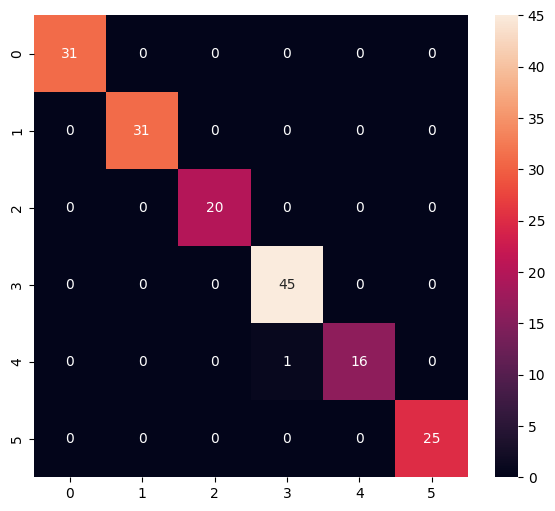

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        20
           3       0.98      1.00      0.99        45
           4       1.00      0.94      0.97        17
           5       1.00      1.00      1.00        25

    accuracy                           0.99       169
   macro avg       1.00      0.99      0.99       169
weighted avg       0.99      0.99      0.99       169



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/mp/t652qdvn7mv2nxpjrf1vssd40000gn/T/tmp4xg5n2px/assets


INFO:tensorflow:Assets written to: /var/folders/mp/t652qdvn7mv2nxpjrf1vssd40000gn/T/tmp4xg5n2px/assets


Saved artifact at '/var/folders/mp/t652qdvn7mv2nxpjrf1vssd40000gn/T/tmp4xg5n2px'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  13471649984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13471658784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13496429808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13496426640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13496433504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13496434208: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1746708085.277096 71474942 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746708085.277348 71474942 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1746708085.280814 71474942 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled


6644

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/charlescai/.pyenv/versions/3.10.3/lib/python3.10/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 306 μs, sys: 468 μs, total: 774 μs
Wall time: 391 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00090438 0.00073091 0.01227614 0.16746914 0.7201424  0.09847696]
4
